In [1]:
import numpy as np
import cPickle
import matplotlib.pyplot as plt
import scipy
import scipy.misc

In [2]:
%matplotlib inline

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [4]:
data_file_folder = 'cifar-10-batches-py/'
data_file_prefix = data_file_folder + 'data_batch_'
files = [data_file_prefix + str(i + 1) for i in range(5)]
files.append(data_file_folder + 'test_batch') #No test needed, so use for training
X_train = np.concatenate([ unpickle(data_file)['data'] for data_file in files])
X_train.shape # (60000, 32*32*3)

(60000, 3072)

In [5]:
resized_folder = "resized_cifar/"
! mkdir resized_cifar
for res in [4, 8, 16, 32]:
    print "resizing to " + str(res)
    for batch in range(6):
        resized = []
        print("batch " + str(batch+1) + " of 6")
        for im in X_train[10000*batch:10000*(batch+1)]:
            resized.append(scipy.misc.imrotate(scipy.misc.imresize(im.reshape([32, 32, 3], order='F'), (res, res, 3)), -90))
        cPickle.dump({ 'data': np.array(resized )}, open(resized_folder + "size_" + str(res) + "_batch_" + str(batch), "wb" ) )

resizing to 4
batch 1 of 6
batch 2 of 6
batch 3 of 6
batch 4 of 6
batch 5 of 6
batch 6 of 6
resizing to 8
batch 1 of 6
batch 2 of 6
batch 3 of 6
batch 4 of 6
batch 5 of 6
batch 6 of 6
resizing to 16
batch 1 of 6
batch 2 of 6
batch 3 of 6
batch 4 of 6
batch 5 of 6
batch 6 of 6
resizing to 32
batch 1 of 6
batch 2 of 6
batch 3 of 6
batch 4 of 6
batch 5 of 6
batch 6 of 6


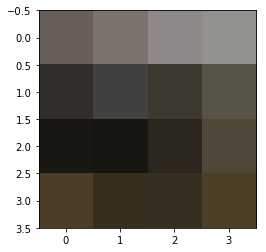

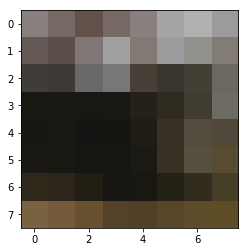

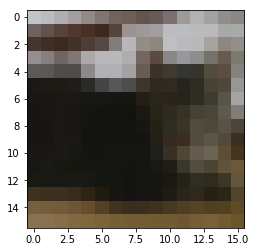

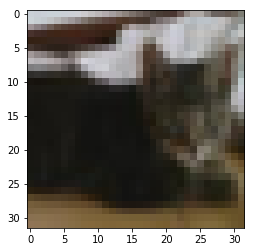

In [7]:
for res in [4, 8, 16, 32]:
    data = unpickle(resized_folder + "size_" + str(res) + "_batch_0")["data"]
    plt.imshow(data[9].reshape([res, res, 3], order='F'))
    plt.show()